In [57]:
import pandas as pd
import numpy as np
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM

#Fetch the Stock Quote

In [29]:
quote = 'BTC-USD'
df = web.DataReader(quote, data_source='yahoo', start='2010-01-01', end='2021-06-14')
df.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,21056800.0,457.334015
2014-09-17,456.859985,413.104004,456.859985,424.440002,34483200.0,424.440002
2014-09-18,427.834991,384.532013,424.102997,394.795990,37919700.0,394.795990
2014-09-19,423.295990,389.882996,394.673004,408.903992,36863600.0,408.903992
2014-09-20,412.425995,393.181000,408.084991,398.821014,26580100.0,398.821014


Get the Dimension of the Dataset

In [30]:
df.shape

(2460, 6)

Visualise the Closing Price History

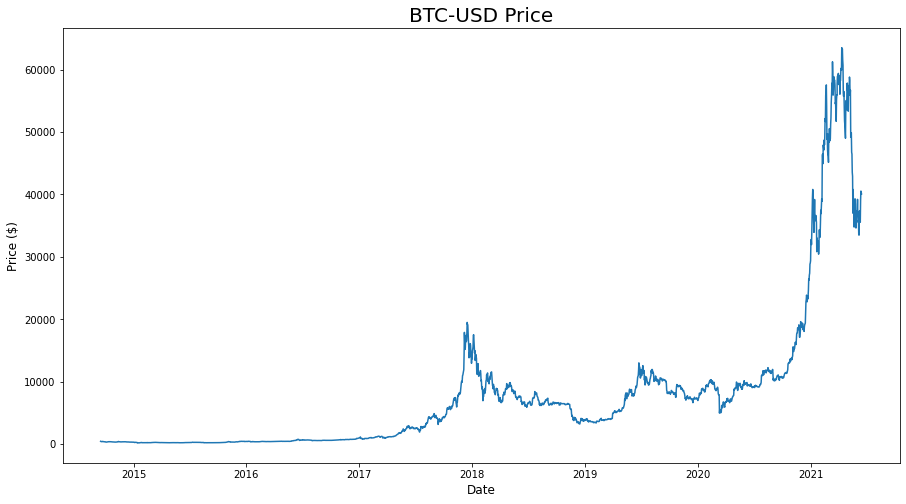

In [31]:
plt.figure(figsize=(15,8))
plt.title(quote + ' Price', fontsize=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.plot(df['Close'])

# Data Preprocessing

Create a Dataframe with the Closing Price

In [40]:
price = df[['Close']]
price

,Close
Date,
2014-09-16,457.334015
2014-09-17,424.440002
2014-09-18,394.795990
2014-09-19,408.903992
2014-09-20,398.821014
...,...
2021-06-10,37334.398438
2021-06-11,35552.515625
2021-06-12,39097.859375


Scale the Data with MinMaxScaler so that Price Values are Between 0 and 1

In [42]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_price = scaler.fit_transform(price)
scaled_price

array([[0.00440947],
       [0.00389002],
       [0.0034219 ],
       ...,
       [0.6145999 ],
       [0.63731136],
       [0.63023216]])

Get the Number of Pricing History to Train the Model on

In [46]:
training_data_len = int(len(scaled_price) * 0.8)
training_data_len

1968

Split Training and Testing Dataset

In [52]:
train_data = scaled_price[0: training_data_len]

X_train = []
y_train = []

# Building the LSTM Model Using Sequential API

In [58]:
model = Sequential()
model.add(LSTM(50, return_sequences=True))